<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part6/P6_Ch03_CH01_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 하이브리드 대화시스템
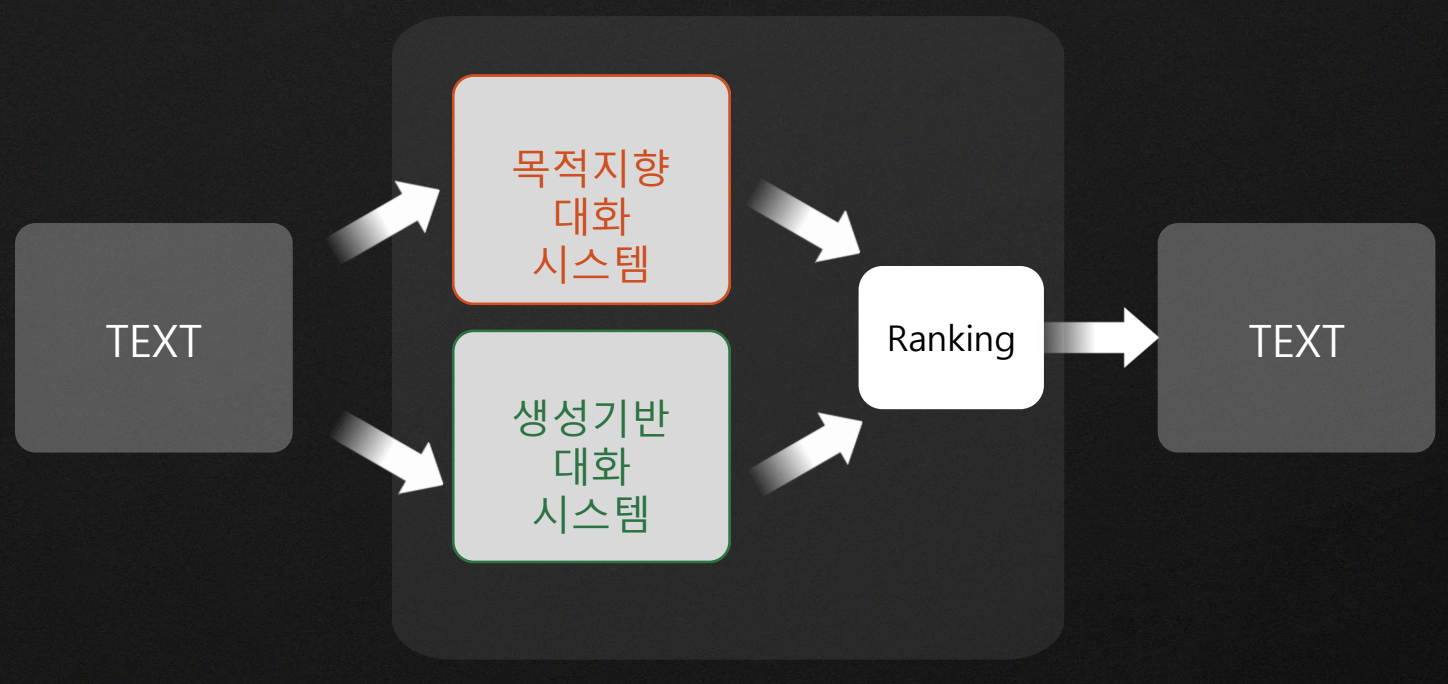

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pytorch-crf
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.1 MB/s eta 0:00:00


In [3]:
import os
import sys
import json
import random
import pandas as pd
import numpy as np
from collections import deque

%cd /content/drive/MyDrive/딥러닝_정주행/P6_Ch03.자연어처리실습_챗봇
from src.model import BiLSTM_CRF, MakeEmbed, textCNN, EpochLogger, save
from src.dataset import Preprocessing, MakeDataset
from src.NLU import NaturalLanguageUnderstanding
from src.DM import DialogManager, E2E_dialog
%cd /root

/content/drive/MyDrive/딥러닝_정주행/P6_Ch03.자연어처리실습_챗봇
/root


In [4]:
class DialogSystem:
    def __init__(self):
        intent_pretrain_path = "/content/drive/MyDrive/딥러닝_정주행/P6_Ch03.자연어처리실습_챗봇/data/pretraining/save/1_intent_clsf_model/intent_clsf_97.217_steps_33.pt"
        entity_pretrain_path = "/content/drive/MyDrive/딥러닝_정주행/P6_Ch03.자연어처리실습_챗봇/data/pretraining/save/1_entity_recog_model/entity_recog_97.192_steps_7.pt"
        ood_pretrain_path = "/content/drive/MyDrive/딥러닝_정주행/P6_Ch03.자연어처리실습_챗봇/data/pretraining/save/1_ood_clsf_model/ood_clsf_99.724_steps_5.pt"
        chitchat_pretrain_path = "/content/drive/MyDrive/딥러닝_정주행/P6_Ch03.자연어처리실습_챗봇/data/pretraining/save/4_chitchat_transformer_model/chitchat_transformer_1.215381_steps_81.pt"

        self.NLU = NaturalLanguageUnderstanding()

        self.NLU.model_load(intent_pretrain_path, entity_pretrain_path, ood_pretrain_path)
        self.dm = DialogManager()

        self.e2e = E2E_dialog(self.NLU.dataset,chitchat_pretrain_path)
        self.result = {
            "DM_result": {},
            "E2E_result" : [],
            "NLG"  : "",
        }
    def task_oriented_dialog_system(self, q):
        NLU_result = self.NLU.run(q)

        system_response = self.dm.run(NLU_result)
        return system_response

    def chit_chat_dialog_system(self, q):
        system_response = self.e2e.predict(q)
        return system_response

    def ranking(self, dm_result, chitchat_result):
        self.result["DM_result"] = dm_result
        self.result["E2E_result"] = list(chitchat_result)
        dm_nlg = dm_result['NLG']

        if(not dm_nlg == []):
            self.result["NLG"] = dm_nlg
            return self.result
        else:
            score = chitchat_result[1]
            print(score)
            if(score>0.05):
                self.result["NLG"] = chitchat_result[0]
                return self.result
            else:
                self.result["NLG"] = "죄송합니다. 다시 말해주세요."
                return self.result

    def run(self, q):
        dm_result = self.task_oriented_dialog_system(q)
        chitchat_result = self.chit_chat_dialog_system(q)
        result = self.ranking(dm_result, chitchat_result)
        return result

In [5]:
dialogsystem = DialogSystem()

In [6]:
result=dialogsystem.run("안녕")

/usr/local/lib/python3.10/dist-packages/torchcrf/__init__.py:305: UserWarning: where received a uint8 condition tensor. This behavior is deprecated and will be removed in a future version of PyTorch. Use a boolean condition instead. (Triggered internally at ../aten/src/ATen/native/TensorCompare.cpp:493.)
  score = torch.where(mask[i].unsqueeze(1), next_score, score)
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:4999: UserWarning: Support for mismatched src_key_padding_mask and mask is deprecated. Use same type for both instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:4999: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


In [7]:
result

{'DM_result': {'STATE': 'DS_REQ_USER_INPUT',
  'SLOT': [],
  'NLU': {'INTENT': 'ood', 'SLOT': []},
  'NLG': ['안녕하세요! 날씨 미세먼지 여행 식당에 대해 물어봐주세요!']},
 'E2E_result': ['알면서도 데이는 인정하고 호의를 보답하세요야할개월이 망설여지야할개월이 망설여지야할개월이 망설여지야할개월이 망설여지야할 아이돌이 봅니다 인정하고 호의를 보답하세요 실망하지 그리워서 친해 수도 있겠네요 준비하면서 들어주세요 준비하면서 들어주세요 준비하면서 들어주세요 준비하면서 들어주세요겠지만 즐겁게 소액결제를 해가 깍아 설명해보세요야할 부분이니야할 부분이니야할',
  0.02633119374513626],
 'NLG': ['안녕하세요! 날씨 미세먼지 여행 식당에 대해 물어봐주세요!']}

In [8]:
result=dialogsystem.run("인천 맛집")
result

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:4999: UserWarning: Support for mismatched src_key_padding_mask and mask is deprecated. Use same type for both instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:4999: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


{'DM_result': {'STATE': 'DS_REQ_USER_INPUT',
  'SLOT': ['LOCATION^인천'],
  'NLU': {'INTENT': 'restaurant', 'SLOT': ['LOCATION^인천']},
  'NLG': ['인천 주변의 추천 식당은 OOOO입니다.']},
 'E2E_result': ['관계의 개선을 필요하겠네요하느냐에.', 0.072874054312706],
 'NLG': ['인천 주변의 추천 식당은 OOOO입니다.']}

In [9]:
result=dialogsystem.run("미세먼지 알려줘")
result

{'DM_result': {'STATE': 'DS_REQ_USER_INPUT',
  'SLOT': [],
  'NLU': {'INTENT': 'dust', 'SLOT': []},
  'NLG': ['오늘 서울의 미세먼지는 좋음입니다.']},
 'E2E_result': ['마스크 쓰고 나가세요. 그렇지만 조금 힘들어져요 되어달라고 인터넷 검색가 꿰메보세요 지켜보세요 봅니다 인정하고 호의를 보답하세요 집착하는 포인트가 따라 다르겠죠 따라 다르겠죠 따라 다르겠죠 않았나봐요 조금이라도야할지 조금이라도야할지 조금이라도야할지 조금이라도야할지 조금이라도야할지 인터넷 검색가 지켜보세요 두셨네요 필요했을텐데 따라 다르겠죠 따라 다르겠죠 않았나봐요 조금이라도',
  0.07088180631399155],
 'NLG': ['오늘 서울의 미세먼지는 좋음입니다.']}

In [10]:
result=dialogsystem.run("대전")
result

{'DM_result': {'STATE': 'DS_REQ_USER_INPUT',
  'SLOT': ['LOCATION^대전'],
  'NLU': {'INTENT': 'ood', 'SLOT': ['LOCATION^대전']},
  'NLG': ['오늘 대전의 미세먼지는 좋음입니다.']},
 'E2E_result': ['소개팅 시켜달라고 올 기대돼 넓으신가봐요 거예요.', 0.1533259004354477],
 'NLG': ['오늘 대전의 미세먼지는 좋음입니다.']}

In [11]:
result=dialogsystem.run("날씨 알려줘")
result

{'DM_result': {'STATE': 'DS_REQ_USER_INPUT',
  'SLOT': [],
  'NLU': {'INTENT': 'weather', 'SLOT': []},
  'NLG': ['오늘 서울의 날씨는 흐림입니다.']},
 'E2E_result': ['나들이 가보세요.', 0.17587070167064667],
 'NLG': ['오늘 서울의 날씨는 흐림입니다.']}

In [12]:
result=dialogsystem.run("난 혼자인게 좋아")
result

0.254427045583725


{'DM_result': {'STATE': '', 'SLOT': '', 'NLU': {}, 'NLG': []},
 'E2E_result': ['이제 일어날 시간이에요 놓아주세요.', 0.254427045583725],
 'NLG': '이제 일어날 시간이에요 놓아주세요.'}

0.2911198139190674


{'DM_result': {'STATE': '', 'SLOT': '', 'NLU': {}, 'NLG': []},
 'E2E_result': ['좋은 회사 근처로 이사를 가보세요.', 0.2911198139190674],
 'NLG': '좋은 회사 근처로 이사를 가보세요.'}

In [ ]:
dialogsystem.dm.clear()

q = ""
q = input()
while(q!="end"):

    result=dialogsystem.run(q)
    print(result['NLG'])
    q = input()

dialogsystem.dm.clear()